In [1]:
# import packages

import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# data from opportunityinsights.org
# readme at opportunityinsights.org/wp-content/uploads/2018/04/Codebook-MRC-Table-6.pdf
# NYT article: nytimes.com/interactive/2015/05/28/upshot/you-draw-it-how-family-income-affects-childrens-college-chances.html

data = pd.read_csv('data/mrc_table6.csv')

In [3]:
# preview the data

data

,par_pctile,tier,tier_name,par_mean,k_mean,k_rank,k_top1pc,k_top5pc,k_top10pc,k_q5,k_q4,k_q3,k_q2,k_q1,k_nowork,married,k_median,k_median_nozero,count,tot_count,density
0,0.0,1.0,Ivy Plus,1500.0,198900.0,0.697863,0.155556,0.303704,0.370370,0.548148,0.118519,0.140741,0.066667,0.125926,0.118519,0.459259,61300.0,68000.0,135.0,52724.0,0.002561
1,0.0,2.0,Other elite schools (public and private),1600.0,70300.0,0.659462,0.071101,0.211009,0.307339,0.506881,0.130734,0.112385,0.103211,0.146789,0.137615,0.465596,56400.0,62400.0,436.0,183973.0,0.002370
2,0.0,3.0,Highly selective public,1700.0,55500.0,0.623840,0.031320,0.146532,0.229306,0.380313,0.227069,0.128635,0.126398,0.137584,0.131991,0.431767,43700.0,50400.0,894.0,393548.0,0.002272
3,0.0,4.0,Highly selective private,1600.0,54000.0,0.592631,0.043307,0.161417,0.259843,0.385827,0.145669,0.137795,0.145669,0.185039,0.181102,0.425197,41200.0,50900.0,254.0,134098.0,0.001894
4,0.0,5.0,Selective public,1800.0,37500.0,0.536784,0.006946,0.049882,0.108287,0.227309,0.231728,0.197159,0.183741,0.160063,0.146330,0.422415,32000.0,37600.0,6335.0,1944082.0,0.003259
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1510,99.9,11.0,Two-year for-profit,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1511,99.9,12.0,Less than two-year schools of any type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1512,99.9,13.0,Attending college with insufficient data,6107500.0,102900.0,0.563356,0.088288,0.190991,0.270270,0.381982,0.122523,0.106306,0.154955,0.234234,0.223423,0.618018,36800.0,53000.0,555.0,942344.0,0.000589
1513,99.9,14.1,Late attender (ages 23-28),5963500.0,43700.0,0.443536,0.040816,0.091837,0.132653,0.209184,0.112245,0.173469,0.183673,0.321429,0.301020,0.418367,18200.0,32500.0,196.0,1239448.0,0.000158


In [4]:
# let's extract the first 3 columns of our data + density + count 

data = data[["par_pctile", "tier", "tier_name", "density", "count"]]
data

,par_pctile,tier,tier_name,density,count
0,0.0,1.0,Ivy Plus,0.002561,135.0
1,0.0,2.0,Other elite schools (public and private),0.002370,436.0
2,0.0,3.0,Highly selective public,0.002272,894.0
3,0.0,4.0,Highly selective private,0.001894,254.0
4,0.0,5.0,Selective public,0.003259,6335.0
...,...,...,...,...,...
1510,99.9,11.0,Two-year for-profit,NaN,NaN
1511,99.9,12.0,Less than two-year schools of any type,NaN,NaN
1512,99.9,13.0,Attending college with insufficient data,0.000589,555.0
1513,99.9,14.1,Late attender (ages 23-28),0.000158,196.0


In [5]:
# let's look at the number of people in each parent percentile

data.groupby(['par_pctile']).sum()

,tier,density,count
par_pctile,,,
0.0,119.3,0.100716,107572.0
1.0,119.3,0.101530,107573.0
2.0,119.3,0.104325,107574.0
3.0,119.3,0.105601,107573.0
4.0,119.3,0.108349,107574.0
...,...,...,...
96.0,119.3,0.275620,107573.0
97.0,119.3,0.307479,107574.0
98.0,119.3,0.347116,107525.0


In [6]:
# we're going to get rid of the 99.9 percentile (its count is different from the others)

data = data[data["par_pctile"] != 99.9]
data

,par_pctile,tier,tier_name,density,count
0,0.0,1.0,Ivy Plus,0.002561,135.0
1,0.0,2.0,Other elite schools (public and private),0.002370,436.0
2,0.0,3.0,Highly selective public,0.002272,894.0
3,0.0,4.0,Highly selective private,0.001894,254.0
4,0.0,5.0,Selective public,0.003259,6335.0
...,...,...,...,...,...
1495,99.0,11.0,Two-year for-profit,0.002741,116.0
1496,99.0,12.0,Less than two-year schools of any type,NaN,NaN
1497,99.0,13.0,Attending college with insufficient data,0.006406,6037.0
1498,99.0,14.1,Late attender (ages 23-28),0.001599,1982.0


In [7]:
# let's look at the people in tier 1 (Ivy Plus)

tier_1_data = data[data["tier"] == 1.0]
tier_1_data

,par_pctile,tier,tier_name,density,count
0,0.0,1.0,Ivy Plus,0.002561,135.0
15,1.0,1.0,Ivy Plus,0.001536,81.0
30,2.0,1.0,Ivy Plus,0.001764,93.0
45,3.0,1.0,Ivy Plus,0.001669,88.0
60,4.0,1.0,Ivy Plus,0.001859,98.0
...,...,...,...,...,...
1425,95.0,1.0,Ivy Plus,0.044932,2369.0
1440,96.0,1.0,Ivy Plus,0.055534,2928.0
1455,97.0,1.0,Ivy Plus,0.073098,3854.0
1470,98.0,1.0,Ivy Plus,0.096313,5078.0


In [8]:
tier_1_data.describe()

,par_pctile,tier,density,count
count,100.000000,100.0,100.000000,100.000000
mean,49.500000,1.0,0.010000,527.240000
std,29.011492,0.0,0.019630,1034.971381
min,0.000000,1.0,0.001517,80.000000
25%,24.750000,1.0,0.002561,135.000000
50%,49.500000,1.0,0.004268,225.000000
75%,74.250000,1.0,0.007406,390.500000
max,99.000000,1.0,0.145190,7655.000000


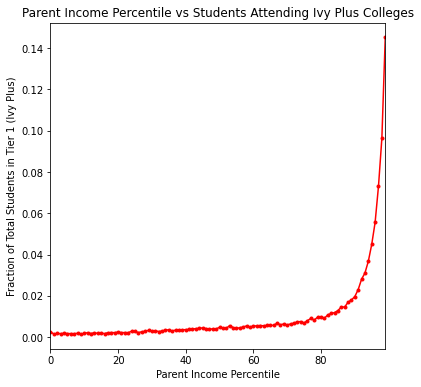

In [9]:
# let's create a line plot of the parent percentiles in tier 1
# first, let's set up a plot

plt.figure(figsize=(6, 6))
plt.ylabel("Fraction of Total Students in Tier 1 (Ivy Plus)")
plt.xlabel("Parent Income Percentile")
plt.title("Parent Income Percentile vs Students Attending Ivy Plus Colleges")
plt.xlim(min(tier_1_data["par_pctile"]), max(tier_1_data["par_pctile"]))

# now, let's plot!

plt.plot(tier_1_data["par_pctile"], tier_1_data["density"], color="red", marker=".")
plt.show()

In [10]:
# ok cool! let's see what happens if we lump all college attending students together
# people in tiers 1 - 13 attend some sort of college
# people in tier 14 do not

data["attends"] = (data["tier"] < 14) * 1
data

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,par_pctile,tier,tier_name,density,count,attends
0,0.0,1.0,Ivy Plus,0.002561,135.0,1
1,0.0,2.0,Other elite schools (public and private),0.002370,436.0,1
2,0.0,3.0,Highly selective public,0.002272,894.0,1
3,0.0,4.0,Highly selective private,0.001894,254.0,1
4,0.0,5.0,Selective public,0.003259,6335.0,1
...,...,...,...,...,...,...
1495,99.0,11.0,Two-year for-profit,0.002741,116.0,1
1496,99.0,12.0,Less than two-year schools of any type,NaN,NaN,1
1497,99.0,13.0,Attending college with insufficient data,0.006406,6037.0,1
1498,99.0,14.1,Late attender (ages 23-28),0.001599,1982.0,0


In [11]:
# we can get rid of the tiers now

data_cleaned = data[["par_pctile", "attends", "density", "count"]]
data_cleaned

,par_pctile,attends,density,count
0,0.0,1,0.002561,135.0
1,0.0,1,0.002370,436.0
2,0.0,1,0.002272,894.0
3,0.0,1,0.001894,254.0
4,0.0,1,0.003259,6335.0
...,...,...,...,...
1495,99.0,1,0.002741,116.0
1496,99.0,1,NaN,NaN
1497,99.0,1,0.006406,6037.0
1498,99.0,0,0.001599,1982.0


In [12]:
# we see some NAs and we probably want to write 0 as NA

data_cleaned = data_cleaned.fillna(0)
data_cleaned

,par_pctile,attends,density,count
0,0.0,1,0.002561,135.0
1,0.0,1,0.002370,436.0
2,0.0,1,0.002272,894.0
3,0.0,1,0.001894,254.0
4,0.0,1,0.003259,6335.0
...,...,...,...,...
1495,99.0,1,0.002741,116.0
1496,99.0,1,0.000000,0.0
1497,99.0,1,0.006406,6037.0
1498,99.0,0,0.001599,1982.0


In [13]:
# let's combine these first 13 tiers and then 14 tiers

data_agg = data_cleaned.groupby(['par_pctile', 'attends']).sum().reset_index()
data_agg

,par_pctile,attends,density,count
0,0.0,0,0.033286,73094.0
1,0.0,1,0.067430,34478.0
2,1.0,0,0.033568,72792.0
3,1.0,1,0.067963,34781.0
4,2.0,0,0.033148,71840.0
...,...,...,...,...
195,97.0,1,0.303678,100185.0
196,98.0,0,0.003337,6522.0
197,98.0,1,0.343779,101003.0
198,99.0,0,0.002958,5878.0


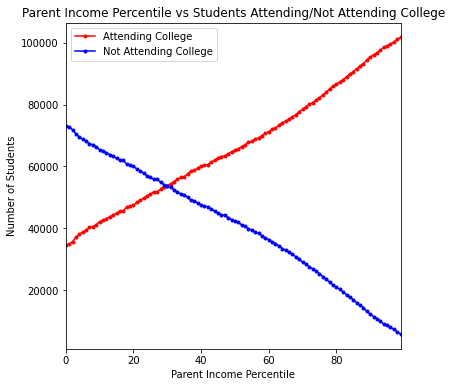

In [14]:
# it's plot time!
# let's create a plot with 2 lines, one for attends and one for does not attend
# first, let's set up a plot

plt.figure(figsize=(6, 6))
plt.ylabel("Number of Students")
plt.xlabel("Parent Income Percentile")
plt.title("Parent Income Percentile vs Students Attending/Not Attending College")
plt.xlim(min(data_agg["par_pctile"]), max(data_agg["par_pctile"]))

# now, let's plot!

plt.plot(data_agg[data_agg["attends"] == 1]["par_pctile"], data_agg[data_agg["attends"] == 1]["count"], 
         color="red", marker=".", label="Attending College")
plt.plot(data_agg[data_agg["attends"] == 0]["par_pctile"], data_agg[data_agg["attends"] == 0]["count"], 
         color="blue", marker=".", label="Not Attending College")
plt.legend()
plt.show()

In [15]:
# let's see if we can model the red line above with a line

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [16]:
# subsetting the data to just attends college

att_data = data_agg[data_agg["attends"] == 1]
train, test = train_test_split(att_data, test_size=0.5)

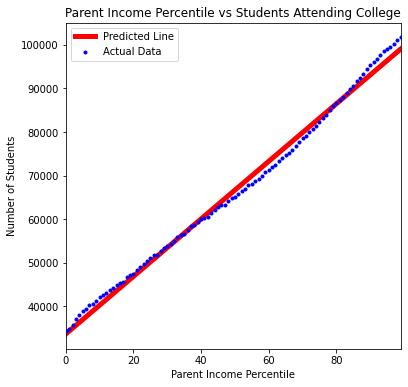

In [18]:
# create a model, let's plot it!

model = LinearRegression().fit(train[["par_pctile"]], train[["count"]])

domain = np.linspace(0, 99, 100)
predicted_range = model.predict(domain.reshape(-1, 1))

# set up plot

plt.figure(figsize=(6, 6))
plt.ylabel("Number of Students")
plt.xlabel("Parent Income Percentile")
plt.title("Parent Income Percentile vs Students Attending College")
plt.xlim(min(att_data["par_pctile"]), max(att_data["par_pctile"]))

# now, let's plot!

plt.scatter(att_data["par_pctile"], att_data["count"], 
         color="blue", marker=".", label="Actual Data", zorder=10)
plt.plot(domain, predicted_range, 
         color="red", label="Predicted Line", linewidth=5, zorder=1)
plt.legend()
plt.show()


In [19]:
# let's see how accurate our model is
predicted_test = model.predict(test[["par_pctile"]])
r2_score(test[["count"]], predicted_test)

0.9943409858300424

In [20]:
# perhaps we'll want to create a nicer visualization for presentation
# for this, we'll export our cleaned data and move to web programming!

att_data = att_data[["par_pctile", "count"]]
att_data.to_csv("data/aggregated_tiers.csv")
att_data

,par_pctile,count
1,0.0,34478.0
3,1.0,34781.0
5,2.0,35734.0
7,3.0,37095.0
9,4.0,38072.0
...,...,...
191,95.0,98899.0
193,96.0,99531.0
195,97.0,100185.0
197,98.0,101003.0


In [36]:
data_tiered = data[["par_pctile", "tier_name", "tier", "count"]]
data_tiered = data_tiered.fillna(0)
data_tiered

,par_pctile,tier_name,tier,count
0,0.0,Ivy Plus,1.0,135.0
1,0.0,Other elite schools (public and private),2.0,436.0
2,0.0,Highly selective public,3.0,894.0
3,0.0,Highly selective private,4.0,254.0
4,0.0,Selective public,5.0,6335.0
...,...,...,...,...
1495,99.0,Two-year for-profit,11.0,116.0
1496,99.0,Less than two-year schools of any type,12.0,0.0
1497,99.0,Attending college with insufficient data,13.0,6037.0
1498,99.0,Late attender (ages 23-28),14.1,1982.0


In [37]:
data_tiered = data_tiered.replace([14.1, 14.2], [14.0, 15.0]) 
data_tiered.to_csv("data/tiered.csv")
data_tiered

,par_pctile,tier_name,tier,count
0,0.0,Ivy Plus,1.0,135.0
1,0.0,Other elite schools (public and private),2.0,436.0
2,0.0,Highly selective public,3.0,894.0
3,0.0,Highly selective private,4.0,254.0
4,0.0,Selective public,5.0,6335.0
...,...,...,...,...
1495,99.0,Two-year for-profit,11.0,116.0
1496,99.0,Less than two-year schools of any type,12.0,0.0
1497,99.0,Attending college with insufficient data,13.0,6037.0
1498,99.0,Late attender (ages 23-28),14.0,1982.0
